# Linear Regression in PyTorch

[link](https://ut.philkr.net/deeplearning/first_example/linear_regression_in_pytorch/)

In [1]:
import torchvision
import torch
from PIL import Image

In [2]:
size = (128,128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size),torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.Flowers102(root='./flowers', split = 'train', download=True, transform=transform)
test_dataset = torchvision.datasets.Flowers102(root='./flowers', split = 'test', download=True, transform=transform)

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())

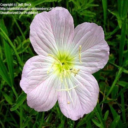

In [3]:
visualize_image(train_dataset[1][0])

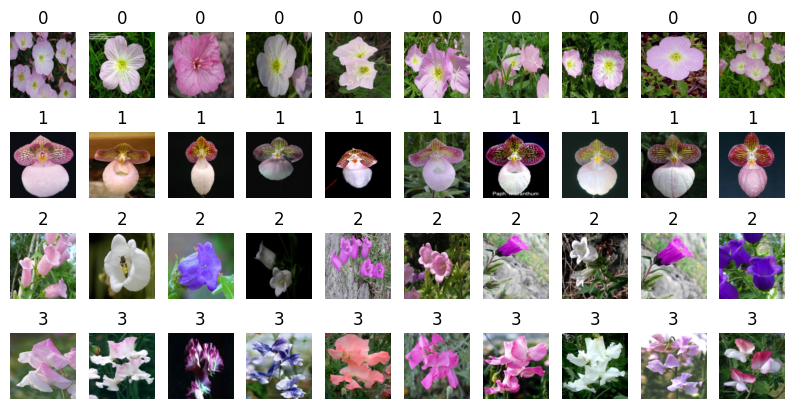

In [4]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4,10, figsize=(10,5))
for i, (im,l) in enumerate(list(train_dataset)[:40]):
    ax[i//10, i%10].imshow(visualize_image(im))
    ax[i//10, i%10].set_title(l)
    ax[i//10, i%10].axis('off')

## Preprossesing

In [5]:
train_images = torch.stack([im for im, _ in train_dataset], dim = 0)
train_labels = torch.tensor([l for _, l in train_dataset])

In [6]:
train_images.shape, train_labels.shape

(torch.Size([1020, 3, 128, 128]), torch.Size([1020]))

In [7]:
train_images = train_images.view(len(train_images), -1)
train_labels = train_labels.float()

train_images=train_images[train_labels<=1]
train_labels=train_labels[train_labels<=1]

In [8]:
train_images.shape, train_labels.shape

(torch.Size([20, 49152]), torch.Size([20]))

## Model

In [9]:
input_dim = train_images.shape[-1]
model = torch.nn.Linear(input_dim, 1)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

## Train

In [10]:
for epoch in range(100):
    pred_y = model(train_images)
    loss_value = loss(pred_y.view(-1), train_labels)
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
    print(f"Epoch {epoch}, loss: {loss_value.item()}")

Epoch 0, loss: 0.41361960768699646
Epoch 1, loss: 0.2840062379837036
Epoch 2, loss: 0.2173067033290863
Epoch 3, loss: 0.17983290553092957
Epoch 4, loss: 0.1565140038728714
Epoch 5, loss: 0.14048954844474792
Epoch 6, loss: 0.12854479253292084
Epoch 7, loss: 0.11910293996334076
Epoch 8, loss: 0.11133849620819092
Epoch 9, loss: 0.1047820895910263
Epoch 10, loss: 0.09914211183786392
Epoch 11, loss: 0.09422197192907333
Epoch 12, loss: 0.08988051116466522
Epoch 13, loss: 0.086011603474617
Epoch 14, loss: 0.0825333371758461
Epoch 15, loss: 0.07938094437122345
Epoch 16, loss: 0.0765029639005661
Epoch 17, loss: 0.07385797798633575
Epoch 18, loss: 0.07141236215829849
Epoch 19, loss: 0.06913881003856659
Epoch 20, loss: 0.06701502948999405
Epoch 21, loss: 0.06502248346805573
Epoch 22, loss: 0.06314601749181747
Epoch 23, loss: 0.06137283891439438
Epoch 24, loss: 0.0596923902630806
Epoch 25, loss: 0.05809561535716057
Epoch 26, loss: 0.05657486990094185
Epoch 27, loss: 0.055123575031757355
Epoch 28, 

## Evaluation

In [11]:
test_images = torch.stack([im for im, _ in test_dataset], dim = 0)
test_labels = torch.tensor([l for _, l in test_dataset])

test_images = test_images.view(len(test_images), -1)
test_labels = test_labels.float()
test_images = test_images[test_labels<=1]
test_labels = test_labels[test_labels<=1]

In [12]:
test_images.shape, test_labels.shape

(torch.Size([60, 49152]), torch.Size([60]))

In [19]:
test_loss = loss(model(test_images).view(-1), test_labels).item()
print(f"{test_loss = }")

test_loss = 0.25594469904899597
